<a href="https://colab.research.google.com/github/ruslanraupoff/mai-416854/blob/master/spa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let’s take the normal (gaussian) distribution as an example. The probability density function (pdf) is:

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/8d08696e5412b294b2a8bf97bd97dd2af6cd7c08)

Basically, if we have a range of x’s, a mean (μ) and a standard deviation (σ), we can pass them onto this formula and get corresponding y values, which we can then plot using the standard matplotlib plot() function:

In [ ]:
%matplotlib inline

import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

Let’s get our x values, determine a mean and a standard deviation, and setup the formula for the normal pdf:

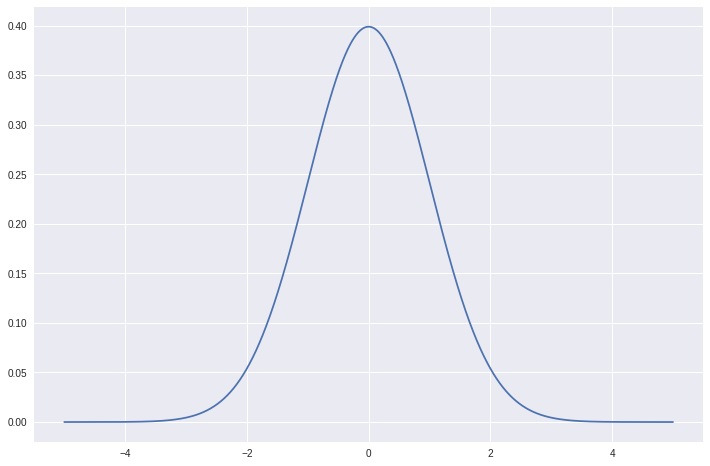

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) *  (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))
plt.plot(x, y)
plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

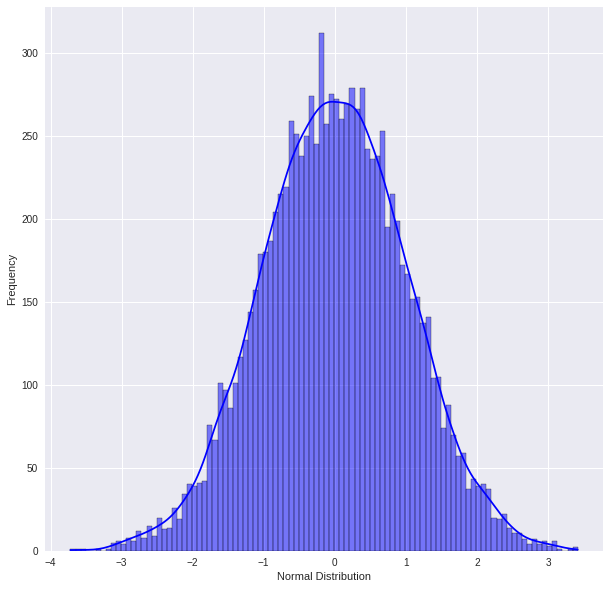

In [ ]:
dn = ss.norm.rvs(size=10000,loc=0,scale=1)
ax = sns.histplot(dn, bins=100, kde=True, color='blue')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## NumPy - Normal Distribution

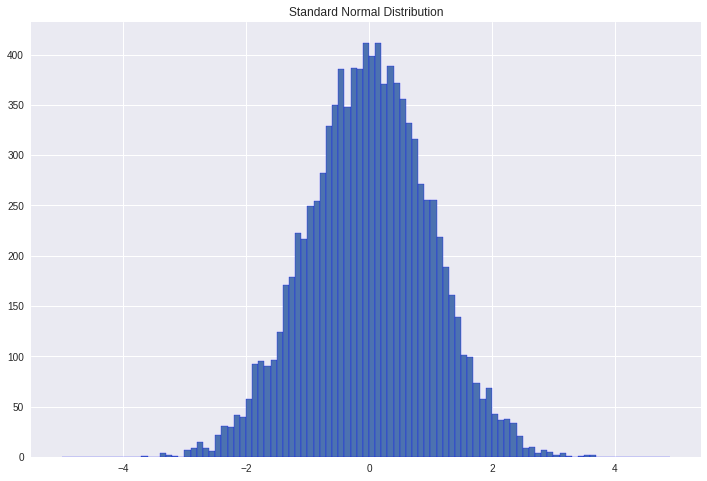

In [ ]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 10000
#drawing 10000 sample from 
#standard normal distribution
sample = np.random.normal(0, 1, size)
bin = np.arange(-5,5,0.1)

plt.hist(sample, bins=bin, edgecolor='blue') 
plt.title("Standard Normal Distribution") 
plt.show()


## Comparing pdfs

Multiple probability density functions can be compared graphically using Seaborn kdeplot() function. In the example below, pdf of three normal distributions (each with mean 0 and standard deviation 1, 2 and 3 respectively) are compared.

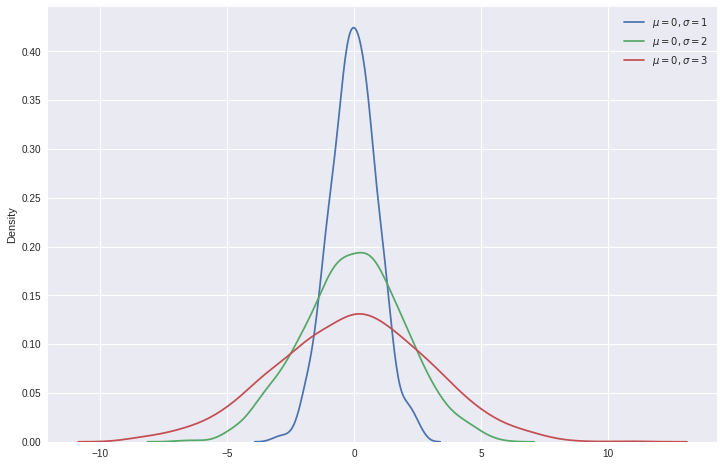

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.normal(0, 1, size))
sns.kdeplot(np.random.normal(0, 2, size))
sns.kdeplot(np.random.normal(0, 3, size))

plt.legend([r"$\mu = 0, \sigma = 1$", 
            r"$\mu = 0, \sigma = 2$", 
            r"$\mu = 0, \sigma = 3$"])
plt.show()


Which is fine and dandy, but it gets quite cumbersome to write those formulas from scratch using numpy and scipy functions for every distribution we want. Some are even really hard to implement, take for example the cumulative distribution function (cdf) for the standard normal distribution:

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/8fd88383d7c6a89c53685e52df2097a0c84f4bef)




Comparing cdfs
Multiple cumulative distribution functions can be compared graphically using Seaborn ecdfplot() function. In the example below, cdf of three normal distributions (each with mean 0 and standard deviation 1, 2 and 3 respectively) are compared.



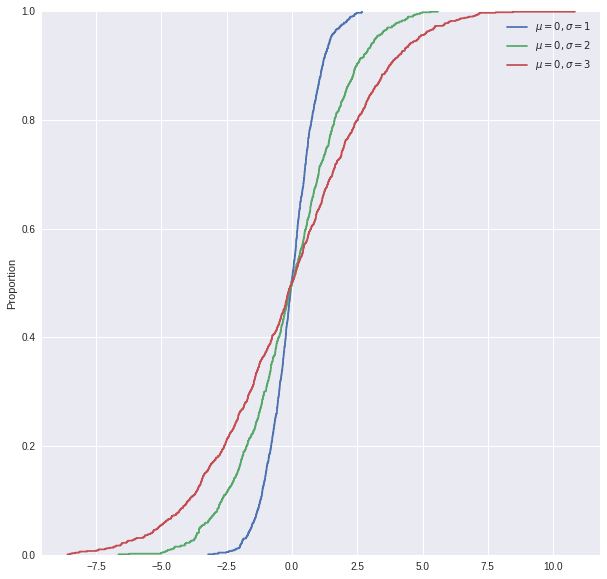

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.ecdfplot(np.random.normal(0, 1, size))
sns.ecdfplot(np.random.normal(0, 2, size))
sns.ecdfplot(np.random.normal(0, 3, size))

plt.legend([r"$\mu = 0, \sigma = 1$", 
            r"$\mu = 0, \sigma = 2$", 
            r"$\mu = 0, \sigma = 3$"])
plt.show()


Fortunately for us, the people at scipy provided nearly every kind of distribution function in the scipy.stats package. Using that, we can achieve the same result as above in a cleaner, less error-prone code. We can even plot the cdf on top of that:

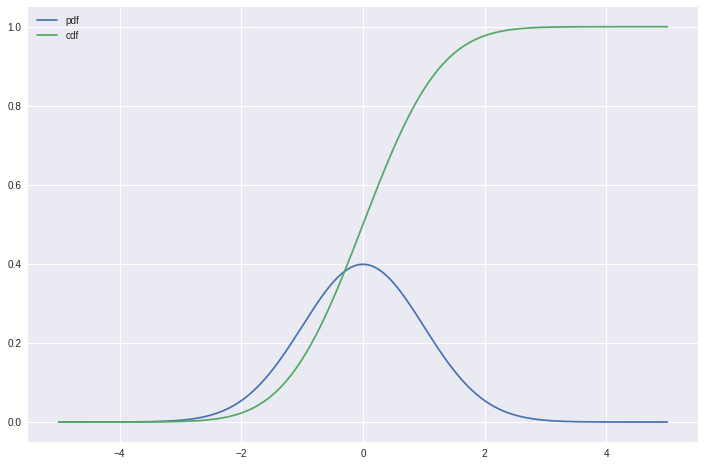

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend()
plt.show()

For reuse, it may be a good idea to put these into a function:

In [ ]:
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)


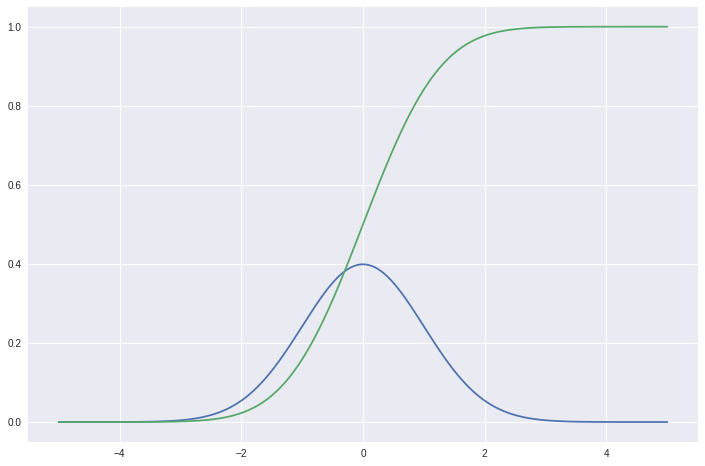

In [ ]:
x = np.linspace(-5, 5, 5000)

plot_normal(x)
plot_normal(x, cdf=True)


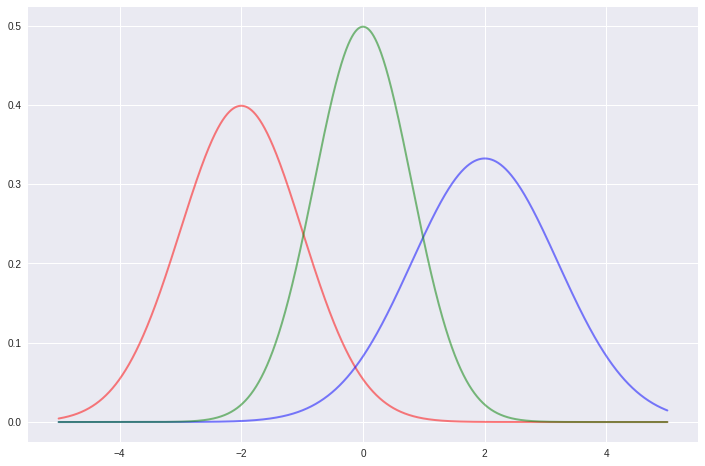

In [ ]:
plot_normal(x, -2, 1, color='red', lw=2, ls='-', alpha=0.5)
plot_normal(x, 2, 1.2, color='blue', lw=2, ls='-', alpha=0.5)
plot_normal(x, 0, 0.8, color='green', lw=2, ls='-', alpha=0.5)

Given this knowledge, we can now define a function for plotting any kind of distribution. The important bit is to be careful about the parameters of the corresponding scipy.stats function (Some distributions require more than a mean and a standard deviation). You can check those parameters on the official docs for scipy.stats.



comparing pdfs (different mean and std)

In the example below, three normal distributions each with different mean and standard deviations are graphically compared.


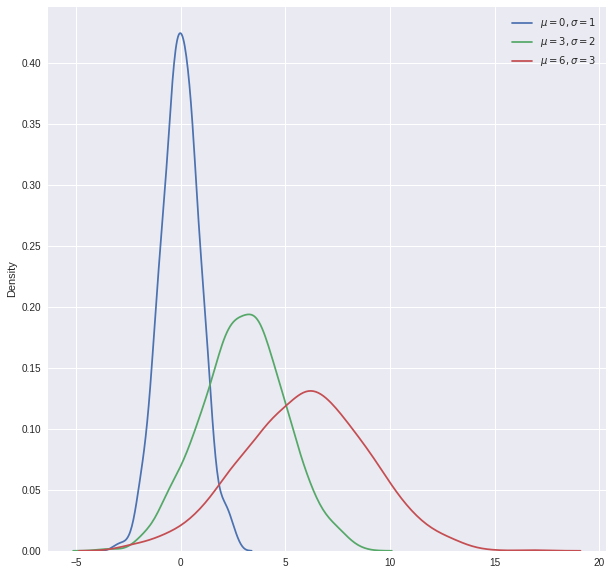

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different normal distribution
sns.kdeplot(np.random.normal(0, 1, size))
sns.kdeplot(np.random.normal(3, 2, size))
sns.kdeplot(np.random.normal(6, 3, size))

plt.legend([r"$\mu = 0, \sigma = 1$", 
            r"$\mu = 3, \sigma = 2$", 
            r"$\mu = 6, \sigma = 3$"])
plt.show()

## The exponential distribution:

In [ ]:
def plot_exponential(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the exponential distribution function for a given x range
    If mu and sigma are not provided, standard exponential is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.expon.cdf(x, mu, sigma)
    else:
        y = ss.expon.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)


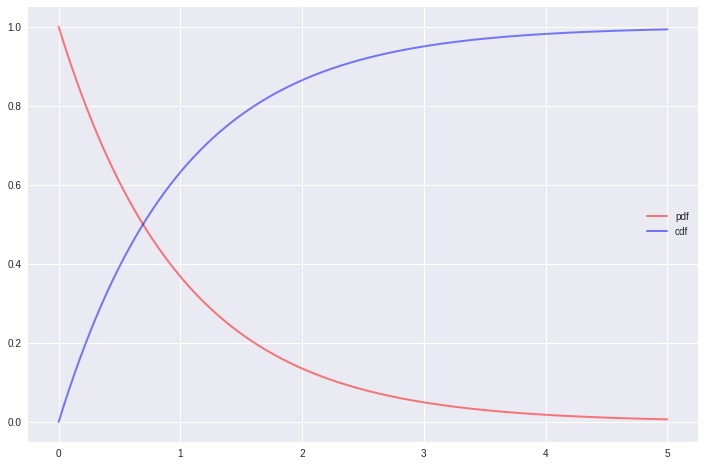

In [ ]:
x = np.linspace(0, 5, 5000)

plot_exponential(x, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_exponential(x, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend()
plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

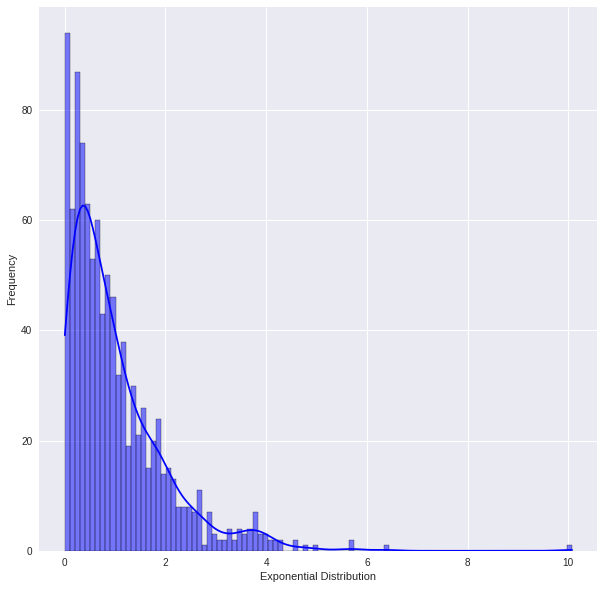

In [ ]:
de = ss.expon.rvs(scale=1,loc=0,size=1000)
ax = sns.histplot(de, kde=True, bins=100, color='blue', alpha=0.5)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## The F distribution:

In [ ]:

def plot_f(x_range, dfn, dfd, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, dfn and dfd
    If mu and sigma are not provided, standard f is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.f.cdf(x, dfn, dfd, mu, sigma)
    else:
        y = ss.f.pdf(x, dfn, dfd, mu, sigma)
    plt.plot(x, y, **kwargs)


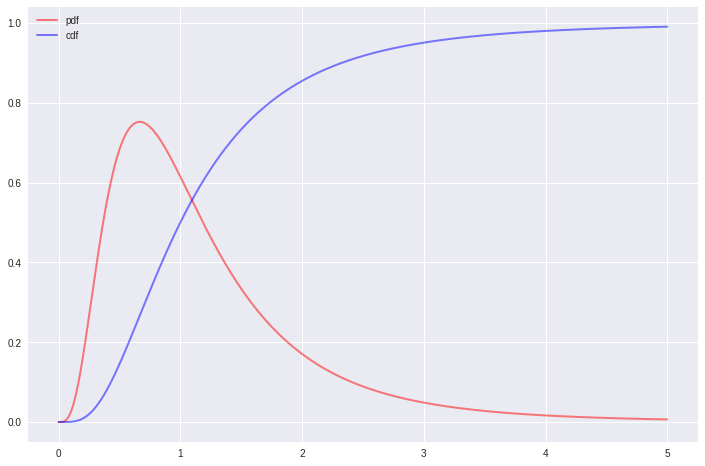

In [ ]:
x = np.linspace(0.001, 5, 5000)

plot_f(x, 10, 10, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_f(x, 10, 10, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend()
plt.show()

## The beta distribution:

In [ ]:
def plot_beta(x_range, a, b, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, a and b
    If mu and sigma are not provided, standard beta is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.beta.cdf(x, a, b, mu, sigma)
    else:
        y = ss.beta.pdf(x, a, b, mu, sigma)
    plt.plot(x, y, **kwargs)


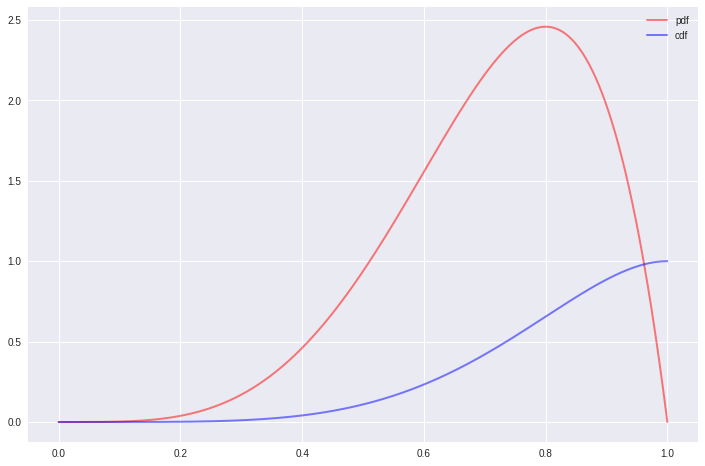

In [ ]:
x = np.linspace(0, 1, 5000)

plot_beta(x, 5, 2, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_beta(x, 5, 2, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend()
plt.show()

## NumPy - Exponential Distribution

Density plot

Matplotlib is a plotting library for the Python which can be used to plot the probability density function (pdf) of exponential distribution using hist() function.

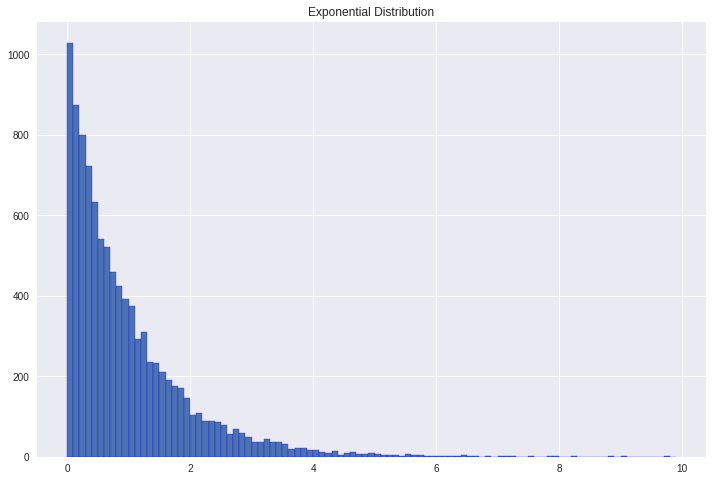

In [ ]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 10000
#drawing 10000 sample from 
#exponential distribution
sample = np.random.exponential(1, size)
bin = np.arange(0,10,0.1)

plt.hist(sample, bins=bin, edgecolor='blue') 
plt.title("Exponential Distribution") 
plt.show()

Comparing pdfs

Multiple probability density functions can be compared graphically using Seaborn kdeplot() function. In the example below, pdf of three exponential distributions (with scale factor 1, 2 and 3 respectively) are compared.

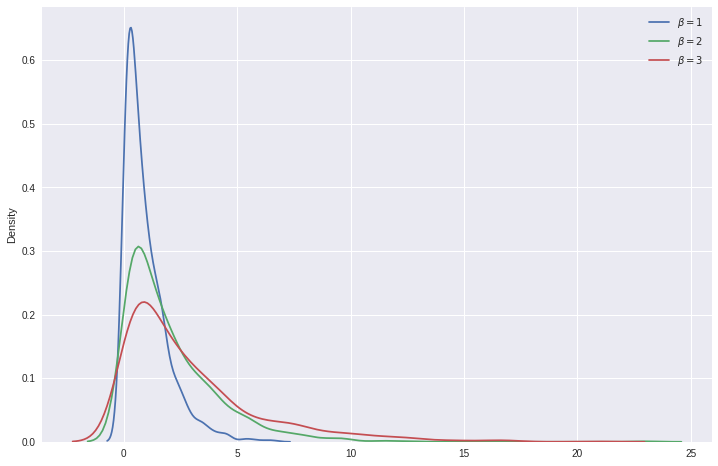

In [ ]:
#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different exponential distribution
sns.kdeplot(np.random.exponential(1, size))
sns.kdeplot(np.random.exponential(2, size))
sns.kdeplot(np.random.exponential(3, size))

plt.legend([r"$\beta = 1$", 
            r"$\beta = 2$", 
            r"$\beta = 3$"])
plt.show()

Comparing cdfs

Multiple cumulative distribution functions can be compared graphically using Seaborn ecdfplot() function. In the example below, cdf of three exponential distributions (with scale factor 1, 2 and 3 respectively) are compared.



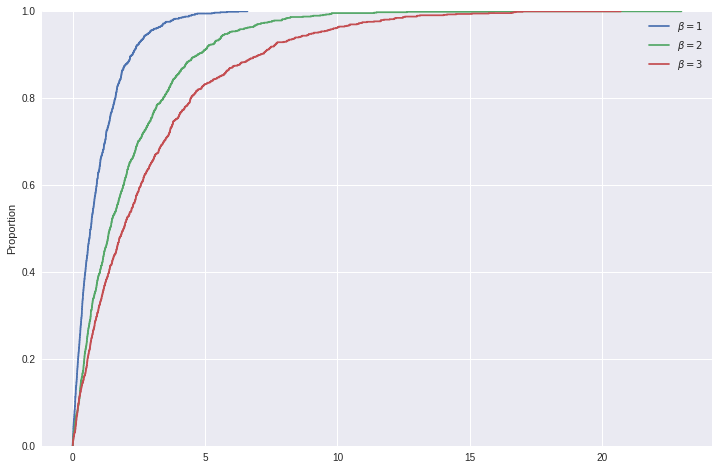

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different exponential distribution
sns.ecdfplot(np.random.exponential(1, size))
sns.ecdfplot(np.random.exponential(2, size))
sns.ecdfplot(np.random.exponential(3, size))

plt.legend([r"$\beta = 1$", 
            r"$\beta = 2$", 
            r"$\beta = 3$"])
plt.show()

#Binomial Distribution

Binomial Distribution is a discrete probability distribution and it expresses the probability of a given number of successes in a sequence of n independent experiments with a known probability of success on each trial.

**The probability mass function (pmf)** of binomial distribution is defined as:

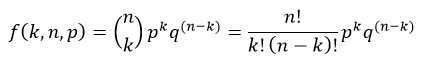

Binomial Distribution
Where,

p is the probability of success in each trial
q is the probability of failure in each trial, q = 1 - p
n is number of trials
k is the number of successes which can occur anywhere among the n trials
An binomial distribution has mean np and variance npq.




**The cumulative distribution function (cdf)** evaluated at k, is the probability that the random variable (X) will take a value less than or equal to k. The cdf of binomial distribution is defined as:

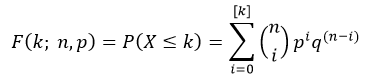

Binomial Distribution
Where, [k] is the greatest integer less than or equal to k.

### The NumPy random.binomial() function returns random samples from a binomial distribution

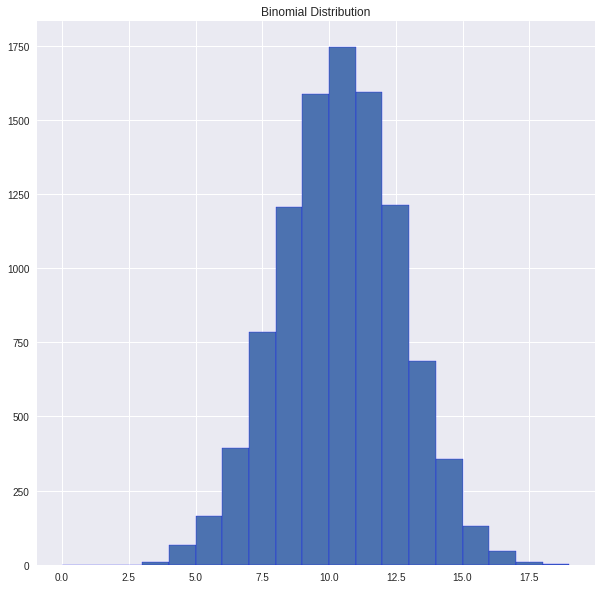

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 10000
#drawing 10000 sample from 
#binomial distribution
sample = np.random.binomial(20, 0.5, size)
bin = np.arange(0,20,1)

plt.hist(sample, bins=bin, edgecolor='blue') 
plt.title("Binomial Distribution") 
plt.show()

**Comparing pmfs**

Multiple mass functions can be compared graphically using Seaborn kdeplot() function. In the example below, pmf of three binomial distributions (each with different number of trials but same probability of success) are compared.

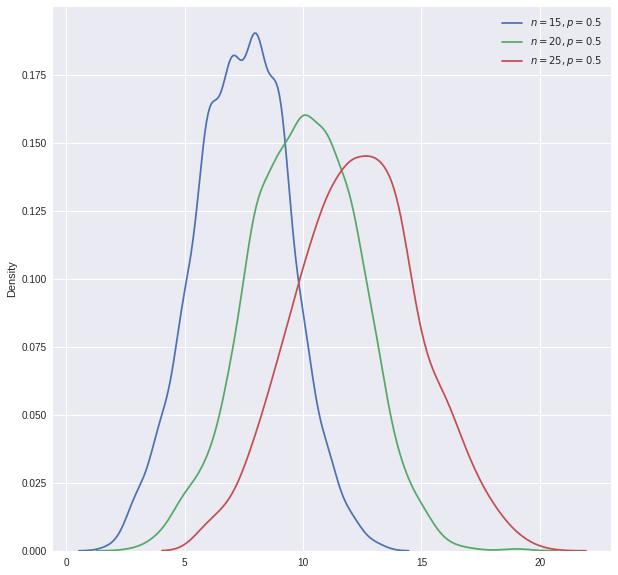

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.kdeplot(np.random.binomial(15, 0.5, size))
sns.kdeplot(np.random.binomial(20, 0.5, size))
sns.kdeplot(np.random.binomial(25, 0.5, size))

plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

**Comparing cdfs**
Multiple cumulative distribution functions can be compared graphically using Seaborn ecdfplot() function. In the example below, cdf of three binomial distributions (each with different number of trials but same probability of success) are compared.



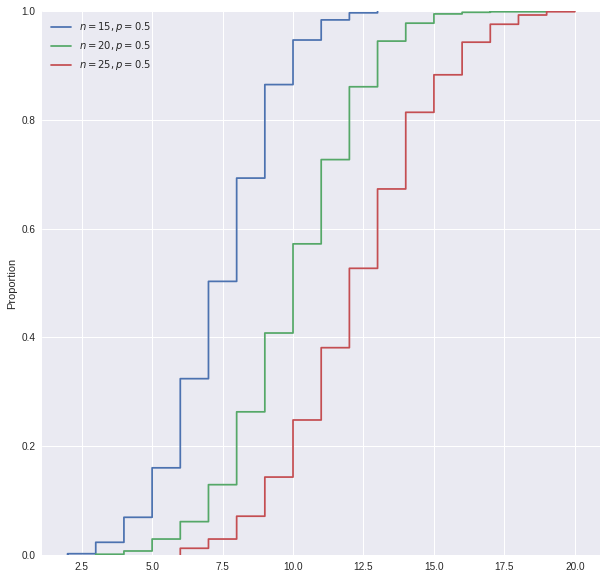

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different binomial distribution
sns.ecdfplot(np.random.binomial(15, 0.5, size))
sns.ecdfplot(np.random.binomial(20, 0.5, size))
sns.ecdfplot(np.random.binomial(25, 0.5, size))

plt.legend(["$n = 15, p = 0.5$", 
            "$n = 20, p = 0.5$", 
            "$n = 25, p = 0.5$"])
plt.show()

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

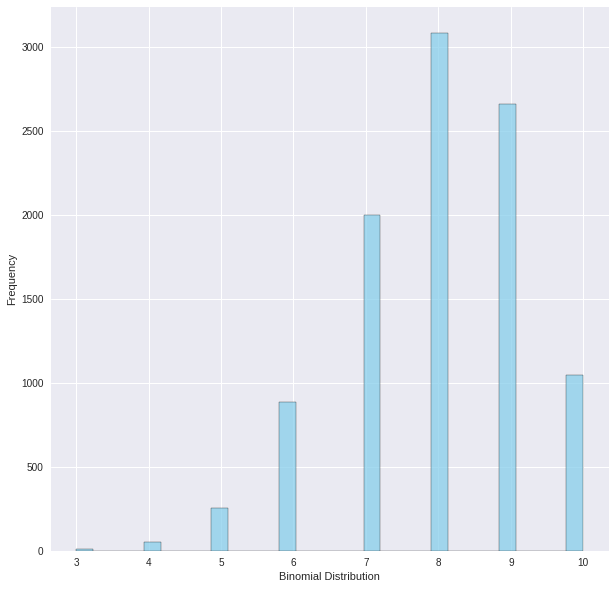

In [ ]:
db = ss.binom.rvs(n=10,p=0.8,size=10000)
ax = sns.histplot(db, bins=30, kde=False, color='skyblue')
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')


## Multinomial Distribution

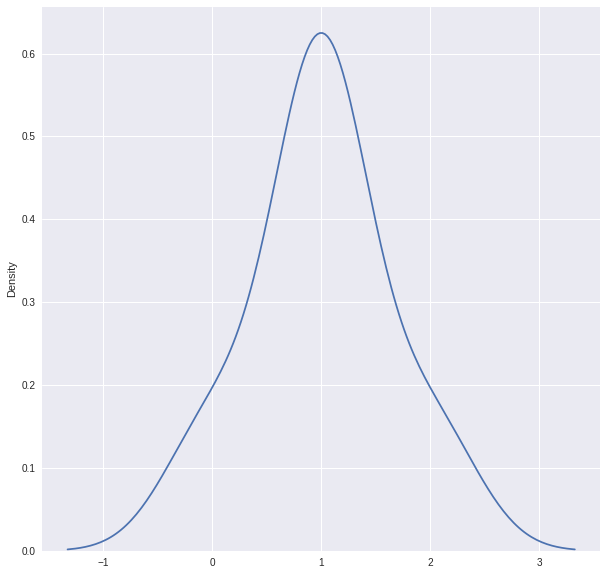

In [ ]:
x = np.random.multinomial(n=6, pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
sns.kdeplot(x)
plt.show()

For the chess tournment we have n=12 trials, pvals = [0.4, 0.35 0.25] as the vector (or list) or probabilities, and for size we may want to simulate different numbers here and visualize the convergence of the probability towards the “analytical” value.


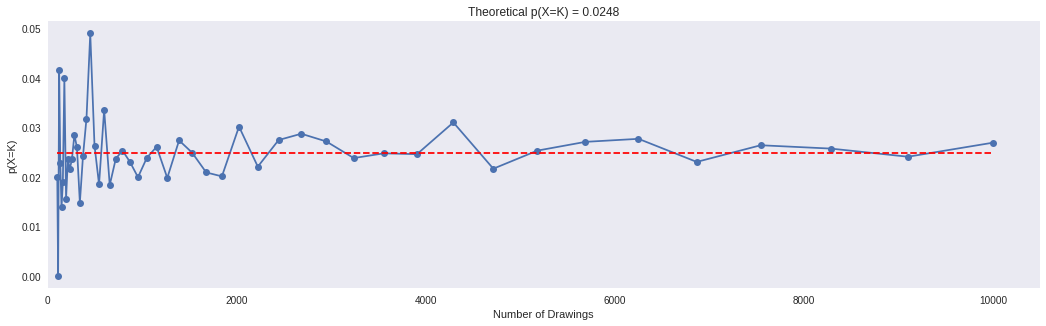

In [ ]:

#fixing the seed for reproducibility
#of the result
np.random.seed(1000)
plt.rcParams.update({'font.size': 22, 'figure.autolayout': True, 'figure.figsize': (15,5)})

#%% Multinoulli example

n = 12                      # number of trials (games in one tourment)
pvals = [0.4, 0.35, 0.25]   # probabilities on a single trial


sizes =[] # number of tournments played
p = []    # a list to hold ratios (converge to prob) that player 1 wins 7 times, player 2 wins 2 times and 3 ties

for size in np.logspace(2,4):
    # the line below is where we actually generate discrete random variables according the multinomial distribution
    outcomes = np.random.multinomial(n, pvals, size=int(size))
    
    # let's count the ratio of the expected outcome over all the outcomes - this will lastly converge to the probability
    prob = sum((outcomes[:,0]==7)&(outcomes[:,1]==2)&(outcomes[:,2]==3))/len(outcomes)
    
    p.append(prob)
    sizes.append(int(size))

# Plotting
fig1 = plt.figure()
plt.plot(sizes,p,'o-')
plt.plot(sizes,[0.0248]*len(sizes),'--r')
plt.grid()
plt.xlim(xmin=0)
plt.xlabel('Number of Drawings')
plt.ylabel('p(X=K)')
plt.title('Theoretical p(X=K) = 0.0248')
plt.show()